In [2]:
# 빈도분석
f = open("Data/speech_moon.txt", "rt")
moon = f.read()
f.close()

f = open("Data/speech_park.txt", "rt")
park = f.read()
f.close()

In [20]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()

moon_nouns = [i for i in okt.nouns(moon) if len(i) >= 2]      # 빈도분석 - 최소 2글자 이상인것만
park_nouns = [i for i in okt.nouns(park) if len(i) >= 2]

Counter(moon_nouns)

Counter({'나라': 26,
         '국민': 21,
         '일자리': 21,
         '대통령': 17,
         '우리': 17,
         '사회': 16,
         '산업': 14,
         '성장': 13,
         '사람': 12,
         '평화': 12,
         '대한민국': 11,
         '확대': 11,
         '우리나라': 10,
         '복지': 10,
         '지금': 9,
         '혁신': 9,
         '정부': 9,
         '국가': 9,
         '교육': 9,
         '정치': 8,
         '경제': 8,
         '위해': 8,
         '복지국가': 8,
         '정의': 7,
         '모두': 7,
         '불안': 7,
         '추진': 7,
         '아이': 6,
         '세상': 6,
         '경쟁': 6,
         '여성': 6,
         '투자': 6,
         '통해': 6,
         '이제': 5,
         '선언': 5,
         '특권': 5,
         '보통사람': 5,
         '정책': 5,
         '기회': 5,
         '고용': 5,
         '더욱': 5,
         '지방': 5,
         '협력': 5,
         '상생': 5,
         '지원': 5,
         '구조': 5,
         '학습': 5,
         '한반도': 5,
         '담쟁이': 5,
         '높이': 4,
         '크게': 4,
         '출마': 4,
         '주인': 4,
         '시민': 4,
  

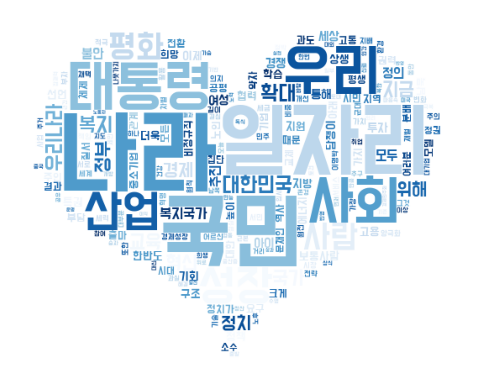

In [27]:
# !pip install wordcloud
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

moon_counter = Counter(moon_nouns)
park_counter = Counter(park_nouns)

wc = WordCloud(background_color="white",
               font_path = "Data/BMDOHYEON_ttf.ttf",
               colormap = "Blues",
               mask = img).generate_from_frequencies(moon_counter)

plt.imshow(wc)
plt.axis("off")
plt.show()

In [26]:
img = np.array(Image.open("Data/하트.png"))        # 검은부분 픽셀값이 0이어야 마스크 가능 
img

# array로 바꿔서 어디가 0이고 어디가 255인지 보여줌

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

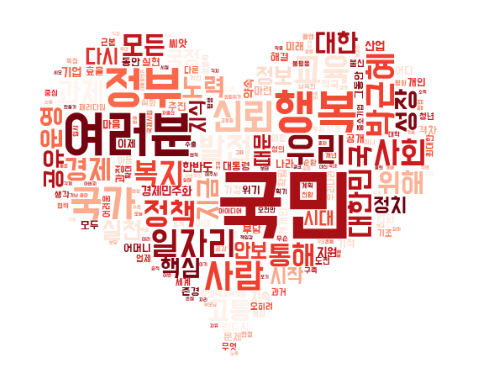

In [29]:
wc = WordCloud(background_color="white",
               font_path = "Data/BMDOHYEON_ttf.ttf",
               colormap = "Reds",
               mask = img).generate_from_frequencies(park_counter)

plt.imshow(wc)
plt.axis("off")
plt.show()

In [36]:
import pandas as pd

A = pd.Series(moon_counter.values()).quantile(0.99)      # 각 단어별 빈도수를 시리즈로
A
# 상위 1%에 해당하는 단어의 빈도수 13번쯤

13.169999999999959

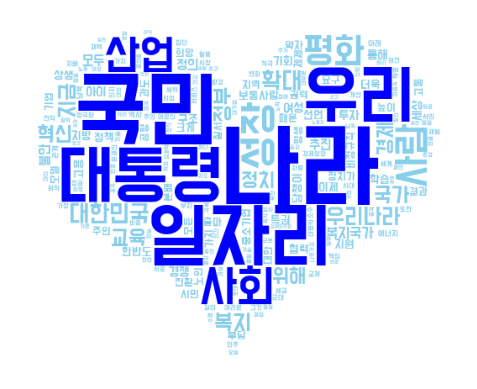

In [39]:
def custom_wc(word, font_size, position, orientation, random_state = None, **kwargs):
    if moon_counter[word] >= A:
        return "blue"        # 상위 1%에 들어가면 파란색으로
    else:
        return "skyblue"     # 상위 1%에 들어가지 않으면 하늘색으로

wc = WordCloud(background_color="white",
               font_path = "Data/BMDOHYEON_ttf.ttf",
               color_func = custom_wc,
               mask = img).generate_from_frequencies(moon_counter)

plt.imshow(wc)
plt.axis("off")
plt.show()

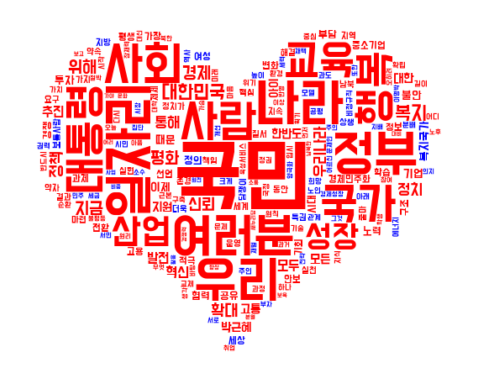

In [54]:
# 문재인+박근혜까지 모두 합쳐서 명사만 추출하고 빈도분석해서 워드 클라우드 그리기!
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 1. 단어별로 출처 저장 (문: blue, 박: red)
origin = {}

for word in moon_counter:
    origin[word] = 'moon'
for word in park_counter:
    origin[word] = 'park'

# 2. 두 Counter 병합
combined_counter = moon_counter + park_counter

# 3. custom color function 정의
def custom_color_func(word, font_size, position, orientation, font_path, random_state):
    if origin.get(word) == 'moon':
        return "blue"
    elif origin.get(word) == 'park':
        return "red"
    else:
        return "gray"  # 혹시 모를 기타

# 4. 워드클라우드 생성
wc = WordCloud(background_color="white",
               font_path="Data/BMDOHYEON_ttf.ttf",
               mask=img,
               color_func=custom_color_func)

wc.generate_from_frequencies(combined_counter)

# 5. 시각화
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
